In [1]:
import camb
from camb import model, initialpower
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook'])
plt.rcParams.update({'font.size': 14})

In [2]:
H0 = 67.4
h = H0 / 100
omega_ch2 = 0.120
omega_bh2 = 0.0224
omega_m = 0.315
ns = 0.965
tau = 0.054

z = np.flip(np.linspace(0, 1, 6))


params = camb.CAMBparams()
params.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)
params.InitPower.set_params(As=2.1e-9, ns=0.965, r=0)
params.set_matter_power(redshifts=z, kmax=1e2)



results = camb.get_transfer_functions(params) # en vez de results
transfer = results.get_matter_transfer_data()
trans = transfer.transfer_data

P = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1e2, npoints=100)

(0.0001, 1000.0)

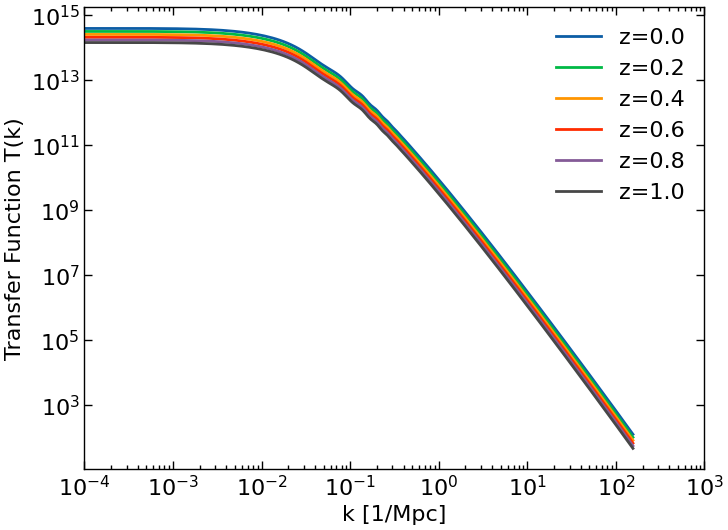

In [3]:
k = trans[0, : , 0]
T = trans[1, : , :]

for redshift in np.flip(range(len(z))):
    plt.loglog(k, T[:,redshift]**2, label=f'z={z[redshift]:.1f}')
plt.legend()
plt.xlabel('k [1/Mpc]')
plt.ylabel('Transfer Function T(k)')
plt.xlim(1e-4,1e3)

(0.0001, 1000.0)

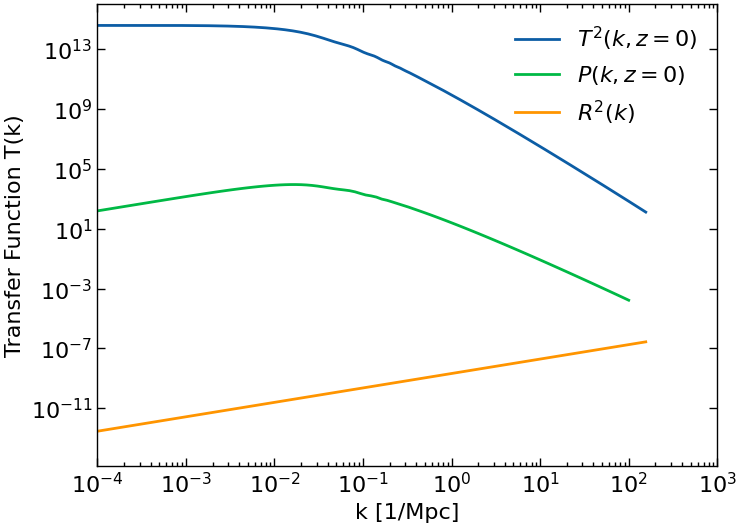

In [4]:
def calc_R(k, As, ns):
    return np.sqrt(As*(k)**(ns))


redshift = 5
R = calc_R(k, 2.1e-9, 0.965)
plt.loglog(k, T[:,redshift]**2, label=r'$T^2(k,z=0)$')
plt.loglog(P[0], P[2][redshift,:], label=r'$P(k,z=0)$')
plt.loglog(k, R**2, label=r'$R^2(k)$')
plt.legend()
plt.xlabel('k [1/Mpc]')
plt.ylabel('Transfer Function T(k)')
plt.xlim(1e-4,1e3)

(0.0001, 1000.0)

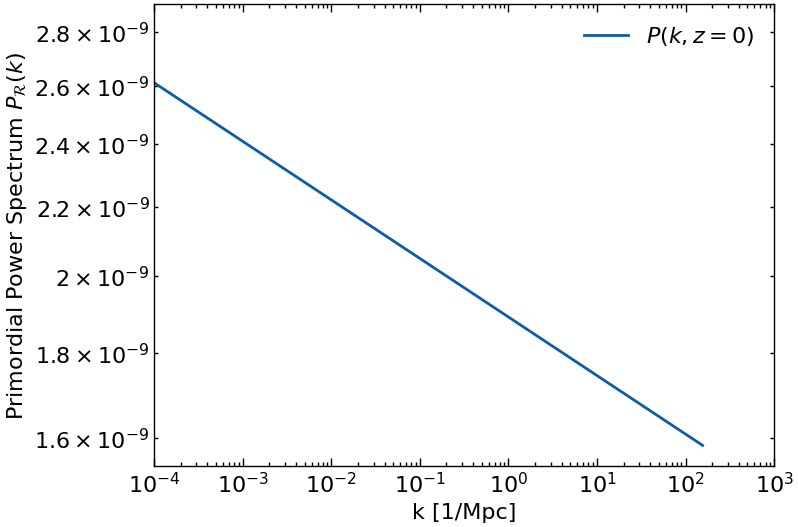

In [5]:
redshift = 5
# plt.loglog(k, T[:,redshift]**2, label=r'$T^2(k,z=0)$')
plt.loglog(k, results.Params.scalar_power(k), label=r'$P(k,z=0)$')
plt.legend()
plt.xlabel('k [1/Mpc]')
plt.ylabel(r'Primordial Power Spectrum $P_\mathcal{R}(k)$')
plt.xlim(1e-4,1e3)



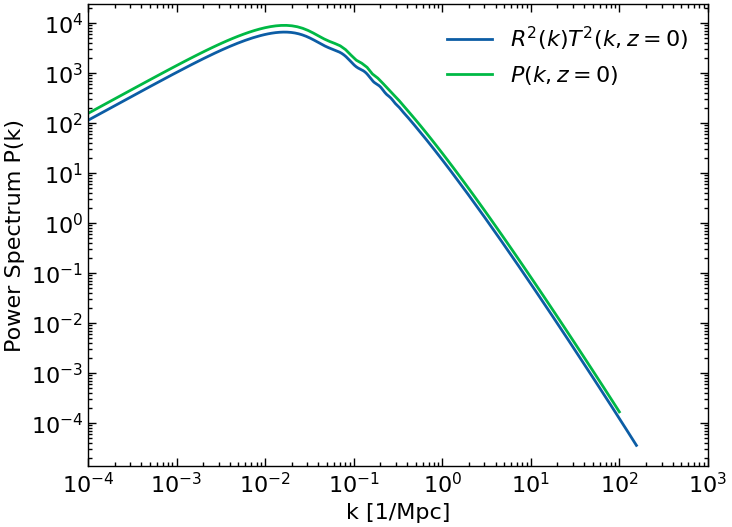

In [6]:

R = calc_R(k, 2.1e-9, 0.965)
P_R = R**2 * T[:, redshift]**2
plt.loglog(k, P_R, label=r'$R^2(k)T^2(k,z=0)$')
plt.loglog(P[0], P[2][redshift,:], label=r'$P(k,z=0)$')
plt.xlim(1e-4,1e3)
plt.xlabel('k [1/Mpc]')
plt.ylabel('Power Spectrum P(k)')
plt.legend()